In [3]:
import numpy as np
import pandas as pd
from deeptables.models import deeptable, deepnets
from deeptables.datasets import dsutils
from sklearn.model_selection import train_test_split

In [4]:
df = dsutils.load_bank()
df.drop(['id'], axis=1, inplace=True)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
y = df_train.pop('y')
y_test = df_test.pop('y')

#### 训练模型

In [5]:
config = deeptable.ModelConfig(nets=deepnets.DeepFM, auto_discrete=True, metrics=['AUC'])
dt = deeptable.DeepTable(config=config)

model, history = dt.fit(df_train, y, epochs=10)

2 class detected, {'no', 'yes'}, so inferred as a [binary classification] task
Preparing features cost:0.059313058853149414
Imputation cost:0.2970578670501709
Categorical encoding cost:0.5658128261566162
Discretization cost:0.17281723022460938
fit_transform cost:1.2272839546203613
Injected a callback [EarlyStopping]. monitor:val_AUC, patience:1, mode:max


/Users/jack/opt/anaconda3/envs/tf_2_0/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/Users/jack/opt/anaconda3/envs/tf_2_0/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/Users/jack/opt/anaconda3/envs/tf_2_0/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


>>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (16)', 'input_continuous_all: (7)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 5, 6, 4, 4, 4, 5, 14, 6, 5, 9, 4, 7, 4, 6, 4]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 71)
---------------------------------------------------------
nets: ['dnn_nets', 'fm_nets', 'linear']
---------------------------------------------------------
dnn: input_shape (None, 71), output_shape (None, 64)
fm: input_shape (None, 16, 4), output_shape (None, 1)
linear: input_shape (None, 23

In [6]:
proba = dt.predict_proba(df_test)
preds = dt.predict(df_test)

transform_X cost:2.421804189682007
predict_proba cost:4.106374979019165
transform_X cost:2.4464831352233887
predict_proba cost:3.472153902053833


/Users/jack/opt/anaconda3/envs/tf_2_0/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
#model.model.summary()

#### 模型评估

In [10]:
result = dt.evaluate(df_test,y_test, batch_size=512, verbose=0)

transform_X cost:2.2823691368103027
transform_y cost:0.0034351348876953125


In [11]:
result

{'loss': 0.17356321665047117, 'AUC': 0.95255023}

#### 输出网络架构

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model.model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


#### 分析训练数据

In [14]:
import matplotlib.pyplot as plt

In [15]:
history.history

{'loss': [99.55112766908482,
  8.31942583989247,
  4.973409516145095,
  3.113147471921413,
  1.703892856179691,
  0.8612194618855076,
  0.4141084979533469,
  0.2601688705267354,
  0.21988824035817106,
  0.205533037615507],
 'AUC': [0.5767789,
  0.6676894,
  0.7149991,
  0.7471698,
  0.78645533,
  0.8261823,
  0.8627972,
  0.8960065,
  0.9149447,
  0.92291546],
 'val_loss': [5.324775922834705,
  2.5425086698872135,
  1.7411014851416375,
  1.026894354801712,
  0.6024773156997911,
  0.34611289704850545,
  0.2566075274723685,
  0.1935023491207915,
  0.1795297256358091,
  0.168539247590632],
 'val_AUC': [0.66308695,
  0.7634834,
  0.8152267,
  0.8572022,
  0.9083639,
  0.9168373,
  0.927058,
  0.9361254,
  0.9429801,
  0.95252967]}

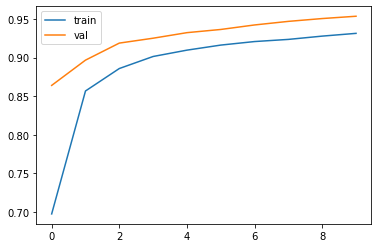

In [10]:
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.legend(['train', 'val'], loc='upper left') 

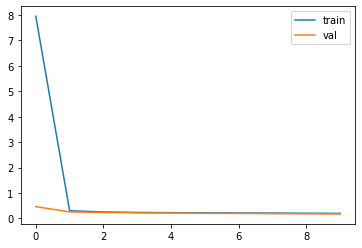

In [11]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'], loc='upper right') 